<font size=3>**1.1 Computer vision**</font>

**Why convolutional?**

The number of parameters will be large in some tasks, which makes it difficult to get enough data to prevent over-fitting and also the competition requirements.  
  
The memory requirement to train too many parameters is a bit infeasible.

<font size=3>**Edge detection example**</font>

**How to detect edges?**

Suppose we have a 6 * 6 grayscale image:  
$$
\begin{aligned}
\begin{bmatrix}
3 & 0 & 1 & 2 & 7 & 4 \\
1 & 5 & 8 & 9 & 3 & 1 \\
2 & 7 & 2 & 5 & 1 & 3 \\
0 & 1 & 3 & 1 & 7 & 8 \\
4 & 2 & 1 & 6 & 2 & 8 \\
2 & 4 & 5 & 2 & 3 & 9 \\
\end{bmatrix}
\end{aligned}
$$

In [32]:
import numpy as np

A = np.array([
    [3, 0, 1, 2, 7, 4],
    [1, 5, 8, 9, 3, 1],
    [2, 7, 2, 5, 1, 3],
    [0, 1, 3, 1, 7, 8],
    [4, 2, 1, 6, 2, 8],
    [2, 4, 5, 2, 3, 9]
])

A

array([[3, 0, 1, 2, 7, 4],
       [1, 5, 8, 9, 3, 1],
       [2, 7, 2, 5, 1, 3],
       [0, 1, 3, 1, 7, 8],
       [4, 2, 1, 6, 2, 8],
       [2, 4, 5, 2, 3, 9]])

In order to detect edges, let's say vertical edges in this image, what you can do is construct a 3 * 3 matrix (a **filter** or a **kernel**). Here the filter is constructed like this:

$$
\begin{aligned}
\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}
\end{aligned}
$$

In [132]:
filter_v = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

filter_v

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

What you're going to do is take the 6 * 6 image and **convolve** it with the 3 * 3 filter. The convolution operation is denoted by **\***.

And the output of this convolution operator is a 4 * 4 matrix.

**Convolution operation**

The **M[0][0]** element in the resulting matrix:

In [160]:
def convolution(A, filter_, row, col):
    print(A[row, col:col+3], " ", filter_[0])
    print(A[row + 1, col:col + 3], "*", filter_[1], "=", np.sum(A[row:row+3, col:col+3] * filter_))
    print(A[row + 2, col:col + 3], " ", filter_[2])
    
convolution(A, filter_v, 0, 0)

[3 0 1]   [ 1  0 -1]
[1 5 8] * [ 1  0 -1] = -5
[2 7 2]   [ 1  0 -1]


The **M[0][1]** one:

In [161]:
convolution(A, filter_v, 0, 1)

[0 1 2]   [ 1  0 -1]
[5 8 9] * [ 1  0 -1] = -4
[7 2 5]   [ 1  0 -1]


The **M[1][0]** one:

In [162]:
convolution(A, filter_v, 1, 0)

[1 5 8]   [ 1  0 -1]
[2 7 2] * [ 1  0 -1] = -10
[0 1 3]   [ 1  0 -1]


**How it works to detect the vertical edge?**

In [163]:
B = np.c_[np.full((6, 3), 10), np.full((6, 3), 0)]
B

array([[10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0]])

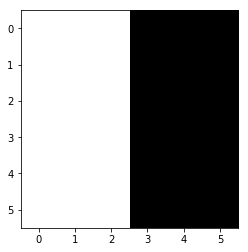

In [164]:
import matplotlib.pyplot as plt

plt.imshow(B, cmap="gray")
plt.show()

Transition: light -> dark

Notice the edge in the middle.

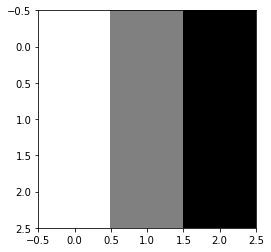

In [165]:
plt.imshow(filter_v, cmap="gray")
plt.show()

left: relatively bright  
right: relatively dark

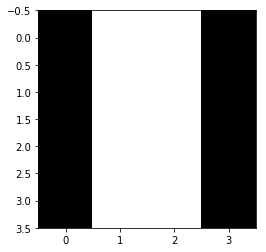

In [166]:
convolved = np.array([[ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0]])  # c * filter_
plt.imshow(convolved, cmap="gray")
plt.show()

The dimensions here seem a little bit wrong. It seems that the detected edge is a little bit fat. That's only because we're working with a pretty small img. If the img is large, the detection works well.

convolved[0][1]: A[0:3, 1:4]  
  
The first col and second col of A[0:3, 1:4]: bright.  
The thrid col of A[0:3, 1:4]  : dark.  
Thus bright -> dark.  
Thus convolved = 30 > 0

<font size=3>1.3 More edgr detection</font>

**Reverse the shape of the transition**

In [167]:
C = np.c_[np.full((6, 3), 0), np.full((6, 3), 10)]
C

array([[ 0,  0,  0, 10, 10, 10],
       [ 0,  0,  0, 10, 10, 10],
       [ 0,  0,  0, 10, 10, 10],
       [ 0,  0,  0, 10, 10, 10],
       [ 0,  0,  0, 10, 10, 10],
       [ 0,  0,  0, 10, 10, 10]])

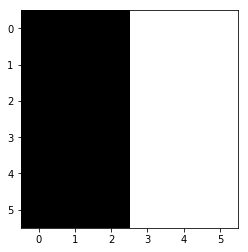

In [168]:
import matplotlib.pyplot as plt

plt.imshow(C, cmap="gray")
plt.show()

Transition: dark -> light

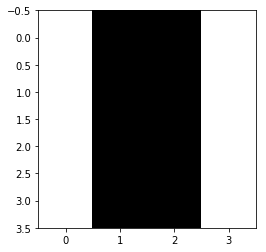

In [169]:
convolved_ = np.array([[ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0],
       [ 0, 30, 30,  0]]) * -1  # C * filter_
plt.imshow(convolved_, cmap="gray")
plt.show()

**Detect horizontal edges**

In [170]:
filter_h = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

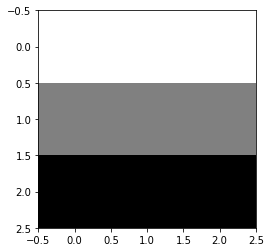

In [171]:
plt.imshow(filter_h, cmap="gray")
plt.show()

top: relatively bright  
bottom: relatively dark

**A more complex example**

In [172]:
D = np.c_[np.r_[np.full((3, 3), 10), np.full((3, 3), 0)], np.r_[np.full((3, 3), 0), np.full((3, 3), 10)]]

In [173]:
convolution(D, filter_h, 1, 1)

[10 10  0]   [1 1 1]
[10 10  0] * [0 0 0] = 10
[ 0  0 10]   [-1 -1 -1]


bright -> dark: two cols  
dark -> bright: one col
  
Thus get a intermediate value, bright -> dark

**Learning to detect edges**

Treat the filter as a matrix containg 9 parameters. Use back prop to find the optimal parameters and make a good filter, which may not only able to detect horizontal and vertical edges, but other kinds of edges.

<font size=3>**1.4 Padding**</font>

Assume that  
  
A.shape = n, n  
filter.shape = f, f  
  
then  
outcome_matrix.shape = n-f+1, n-f+1

**Downsides**

1. **shrinking output**: The img will shrink every time the convolution operator is applied.  
2. **throwing away info from edges**: pixels on the corners or on the edges are used much less in the output so you're throwing away a lot of info.

**Solution**

Pad the image.  
  
Pad the img with an additional border of one pixel all around the edges: 6 * 6 -> 8 * 8. Then after the convolution, get a 6 * 6 matrix.  
  
By convention pad with 0s.  
  
p: padding amount. 1 here.  
After padding, the output size will be n+2p-f+1, n+2p-f+1
  
If you want, you can pad more pixels.

**Valid and Same convolutions**  

valid: no convolution  
same: pad so that output size is the same as the input size. $p = \frac{f - 1}{2}$ 

By convention, f is usually odd.

<font size=3>**Strided convolutions**</font>

from left to right:

<font color=blue>1 1 1</font> 1 1 1 1&nbsp;&nbsp;&nbsp;1 1 <font color=blue>1 1 1</font> 1 1  
<font color=blue>1 1 1</font> 1 1 1 1&nbsp;&nbsp;&nbsp;1 1 <font color=blue>1 1 1</font> 1 1  
<font color=blue>1 1 1</font> 1 1 1 1&nbsp;&nbsp;&nbsp;1 1 <font color=blue>1 1 1</font> 1 1  
1 1 1 1 1 1 1&nbsp;&nbsp;&nbsp;1 1 1 1 1 1 1  
1 1 1 1 1 1 1&nbsp;&nbsp;&nbsp;1 1 1 1 1 1 1  
1 1 1 1 1 1 1&nbsp;&nbsp;&nbsp;1 1 1 1 1 1 1  
1 1 1 1 1 1 1&nbsp;&nbsp;&nbsp;1 1 1 1 1 1 1  

from top to bottom:

<font color=blue>1 1 1</font> 1 1 1 1  
<font color=blue>1 1 1</font> 1 1 1 1  
<font color=blue>1 1 1</font> 1 1 1 1  
1 1 1 1 1 1 1  
1 1 1 1 1 1 1  
1 1 1 1 1 1 1  
1 1 1 1 1 1 1  
  
  
  
1 1 1 1 1 1 1  
1 1 1 1 1 1 1  
<font color=blue>1 1 1</font> 1 1 1 1  
<font color=blue>1 1 1</font> 1 1 1 1  
<font color=blue>1 1 1</font> 1 1 1 1  
1 1 1 1 1 1 1  
1 1 1 1 1 1 1

s: stride. 2 here.  
the output size: $\lfloor \frac{n + 2p - f}{s} + 1 \rfloor$, $\lfloor \frac{n + 
2p - f}{s} + 1 \rfloor$

**Technical note on cross-correlation vs. convolution**

The course skipped the mirroring operation. Technically, what's really doing in the videos is sometimes called cross-correlation instead of convolution.But in dl literature, by convention, we just call this a convolution operation. By convention in machine learning, we usually do not bother with this flipping operation. The mirroring operation is not necessary in neural networks.

<font size=3>**1.6 Convolutions over volumnes**</font>

An RGB img for example:  
6 * 6 * 3 (height * width * number of channels)  
  
And the filter should be:  
3 * 3 * 3 (height * width * number of channels)  
  
The number of channels (also called the dpeth) in the img must match the number of channels in the filter.  
  
The output: 4 * 4 * 1

**How to compute?**

Similar to the case of 2d. M[0][0]: 27 numbers * numbers

**What can this do?**

Suppose we are to detect vertical edges in the red channels of the img, the red channel of the filter can be:
$$
\begin{aligned}
\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}
\end{aligned}
$$
  
And the grean and blue channels all 0s.

If you don't care what color it is, to detect vertical edges we can make three channels all the same as the red channel matrix above.

**Multiple filters**

If we want to detect vertical, horizontal or other kinds of edges at the same time, we can use multiple edges.  
  
Stack outputs of every filters together to form an outcome with multiple channels.

The img: n, n, $n_c$ (the number of channels)  
The filter: f, f, $n_c$  
Outcome: n - f + 1, n - f + 1, $n_c^{'}$ (the number of filters)

<font size=3>**1.7 One layer of a convolutional network**</font>

**One layer**

input: 6, 6, 3  
filter1: 3, 3, 3  
filter2: 3, 3, 3  
  
for the outcome of filter1: add a b1, and Relu(outcome1 + b1)  
for the outcome of filter2: add a b2, and Relu(outcome2 + b2)  
  
And stack the two matrices together we get a 4, 4, 2 output

Recall that  
$Z^{[1]} = W^{[1]} a^{[0]} + b^{[1]}$  
$a^{[1]} = g(Z^{[1]})$

The input here: $a^{[0]}$  
The filters: $W^{[1]}$  
outcome + b: $Z^{[1]}$  
Relu(): g()  
stacked outcome: $a^{[1]}$

The number of parameters in a layer containing filters is determined by the number of **filters** (input features), no matter how large the input data is. It's a property of convolutional neural nets that **makes them less prone to over fitting.**

**Some notation**

If layer $l$ is a convolutional layer:  

Input:$n^{[l-1]}_H * n^{[l-1]}_W * n^{[l-1]}_c$  
Output:$n^{[l]}_H * n^{[l]}_W * n^{[l]}_c$

$f^{[l]}$ = filter size  
$p^{[l]}$ = padding  
$s^{[l]}$ = stride  
$n^{[l]}_c$ = number of filters  
  
Each filter is: $f^{[l]} * f^{[l]} * n^{[l-1]}_c$  
Activations: $a^{[l]}$ -> $n^{[l]}_H * n^{[l]}_W * n^{[l]}_c$ (one example), $m * n^{[l]}_H * n^{[l]}_W * n^{[l]}_c$ (m examples)  
Weight: $f^{[l]} * f^{[l]} * n^{[l-1]}_c * n^{[l]}_c$  
bias: $n^{[l]}_c$ or (1, 1, 1, $n^{[l]}_c$)  
  
$n^{[l]}_H = \lfloor \frac{n^{[l-1]}_W + 2p^{[l]} - f^{[l]}}{s^{[l]}} + 1 \rfloor$  
$n^{[l]}_W = \lfloor \frac{n^{[l-1]}_H + 2p^{[l]} - f^{[l]}}{s^{[l]}} + 1 \rfloor$

<font size=3>**1.8 A simple convolutional network example**</font>

The final step of the convomutional part: unroll all numbers in the output into a very long vector, so that you just have one long vector to feed into soft max, into logistic reg, in order to make a prediction for the final output.

**Hyperparameters**

Typically you start out with larger images, and then the height and width will stay the same for a while and gradually trend down as you go deeper in your networks, whereas the number of channels will generally increase.

**Types of layer in a convolutional network**

In a typical ConvNet, there are usually three types of layers. One is the **conv layer**, notated as **CONV**. It turns out that there are two other common types of layers that you have not seen yet, a **pooling layer** (**POOL**) and a **fully connected layer** (**FC**).

<font size=3>**1.9 Pooling layers**</font>

Can be used to reduce the size of the repr of neural networks to speed up computation  
make some of the features it detects a bit more robust 

**max pooling**

Suppose we have a 4 * 4 matrix:  
$$
\begin{aligned}
\begin{bmatrix}
1 & 3 & 2 & 1 \\
2 & 9 & 1 & 1 \\
1 & 3 & 2 & 3 \\
5 & 6 & 1 & 2 \\
\end{bmatrix}
\end{aligned}
$$  
  
The result of the max pooling will be a 2 * 2 matrix:  
$$
\begin{aligned}
\begin{bmatrix}
9 & 2 \\
6 & 3 \\
\end{bmatrix}
\end{aligned}
$$  
  
The M[0][0] in the output matrix comes from choosing the max from 
\begin{aligned}
\begin{bmatrix}
1 & 3 \\
2 & 9 \\
\end{bmatrix}
\end{aligned}

And M[0][1]
\begin{aligned}
\begin{bmatrix}
2 & 1 \\
1 & 1 \\
\end{bmatrix}
\end{aligned}

It's like we used a 2 * 2 filter with f = 2, s = 2.

**What it does**

What the max operation does is so long as the feature is detected anywhere in one in one of these quadrants, it then remains preserved in the output of Max pooling. What the max operator does is really says, if this feature is detected anywhere in this filter, then keep a high number. But if this feature is not detected, maybe this feature does not exist in the upper right hand quadrant, then the max of all those numbers is still itself quite small. 

It has a set of hyperparameters (f = 2 and s = 2 here), but there's actually nothing for gd to learn.

**3d input**

The output will have the same dimension (3d for a 3d input). Use the first channel of the input matrix to get the first channel of the output matrix, and so on. If the input is 5 * 5 * 2, the output is 3 * 3 * 2, if f = 3 and s = 1.

**Average pooling**

Instead of the max, take the average. For the first example, M[0][0] will be 3.75.

**summary of pooling**

Hyperparameters:  
&nbsp;&nbsp;&nbsp;&nbsp;f: filter size  
&nbsp;&nbsp;&nbsp;&nbsp;s: stride  
  
Size:  
&nbsp;&nbsp;&nbsp;&nbsp;Intput: $n_H$ * $n_W$ * $n_c$  
&nbsp;&nbsp;&nbsp;&nbsp;Output: $\lfloor \frac{n_H - f}{s} + 1 \rfloor$ * $\lfloor \frac{n_W - f}{s} + 1 \rfloor$ * $n_c$   
  
Max or average pooling.  
  
The common choice of hyperparameters: f = 2, s = 2. This has the effect of roughly shrinking the height and width by a factor of about two.  
  
No parameters to learn when implementing back prop.

<font size=3>**1.10 Convolutional neural network example**</font>

There are two conventions which are slightly in consistence about what you call a layer. One convention is that CONV + POOL is a layer, and the other is CONV a layer, and POOL a layer. When people report a number of layers in a neural network, usually people report just the number of layers that have weights, that have parameters, and because the pooling layer has no weights, has no parameters, only a few hyperparameters, the video uses the convention that treating the CONV and POOL together as a layer. 

**fully connected layer**

It is just like a single neural network, is just a standard neural network where you have a weight matrix.

<font size=3>**1.11 Why convolutions?**</font>

Rather than using all fully connected layers, CNN has mainly two advantages:  
1. parameter sharing: A feature detector (such as a vertical edge detector) that's useful in one part of the image is probably useful in another part of the image.  
2. sparsity of connections: In each layer, each output value depends only on a small number of inputs.  

**Cost func of a CNN**

It looks like the cost func of a logistic reg model:  
$J = \frac{1}{m} \sum^m_{i=1} L(\hat y^{(i)}, y^{(i)})$